In [32]:
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic

import artist_info_helper as aih

import glob, os, re, sys
from datetime import datetime
import pickle
import time
import copy
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('mpl_style_Jeffreson.mplstyle')

In [2]:
def log_format(x, pos):
    return f'{int(x)}'

# analysis for random artists

In [53]:
DEFAULT_RND_DIR = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/"
data = pd.read_csv(DEFAULT_RND_DIR + "Spotify_artist_info_Mnth-Lstnrs.csv")
print(data.keys())

ds = pd.DataFrame(data)
ds = ds[(ds['monthly_listeners'] > 0) & (ds['first_release'] > 0)]

ds['first_release'] = datetime.now().year - ds['first_release'] # years since first release

Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks', 'monthly_listeners'],
      dtype='object')


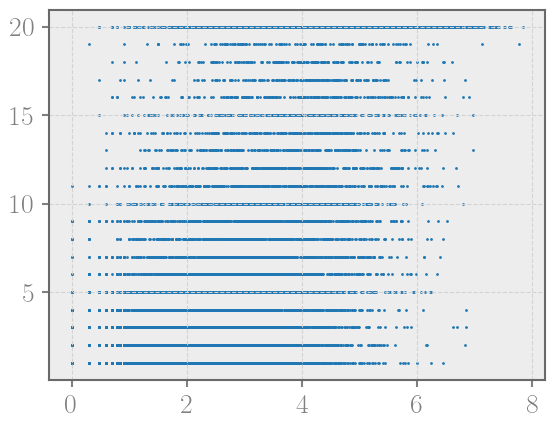

In [46]:
plt.scatter(np.log10(ds['monthly_listeners']), ds['num_releases'], s=1)
plt.show()

# separate out active artists

In [47]:
data_active = pd.DataFrame.from_dict(aih.get_active_artists(data))
ds_active = pd.DataFrame(data_active)
ds_active = ds_active[(ds_active['monthly_listeners'] > 0) & (ds_active['first_release'] > 0)]

ds_active['first_release'] = datetime.now().year - ds_active['first_release'] # years since first release

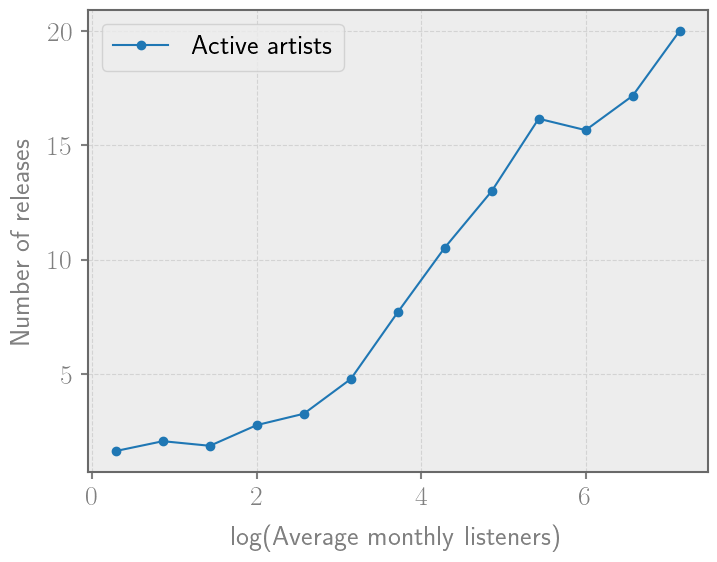

In [52]:
# get the average number of monthly listeners in bin of years since first release, using scipy binned_statistic

binned_stat_active = binned_statistic(np.log10(ds_active['monthly_listeners']), ds_active['num_releases'], statistic='mean', bins=np.linspace(0., 8., 15))
bin_centers = 0.5*(binned_stat_active.bin_edges[1:] + binned_stat_active.bin_edges[:-1])

# plot the average number of monthly listeners in bin of years since first release
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(bin_centers, binned_stat_active.statistic, label='Active artists', marker='o')
ax.set_ylabel('Number of releases')
ax.set_xlabel('log(Average monthly listeners)')
ax.legend()
plt.show()

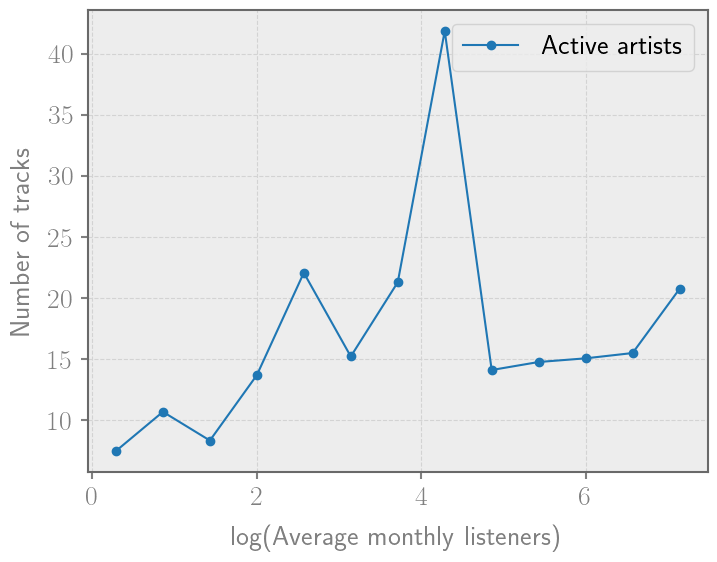

In [55]:
# get the average number of monthly listeners in bin of years since first release, using scipy binned_statistic

binned_stat_active = binned_statistic(np.log10(ds_active['monthly_listeners']), ds_active['num_tracks'], statistic='mean', bins=np.linspace(0., 8., 15))
bin_centers = 0.5*(binned_stat_active.bin_edges[1:] + binned_stat_active.bin_edges[:-1])

# plot the average number of monthly listeners in bin of years since first release
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(bin_centers, binned_stat_active.statistic, label='Active artists', marker='o')
ax.set_ylabel('Number of tracks')
ax.set_xlabel('log(Average monthly listeners)')
ax.legend()
plt.show()

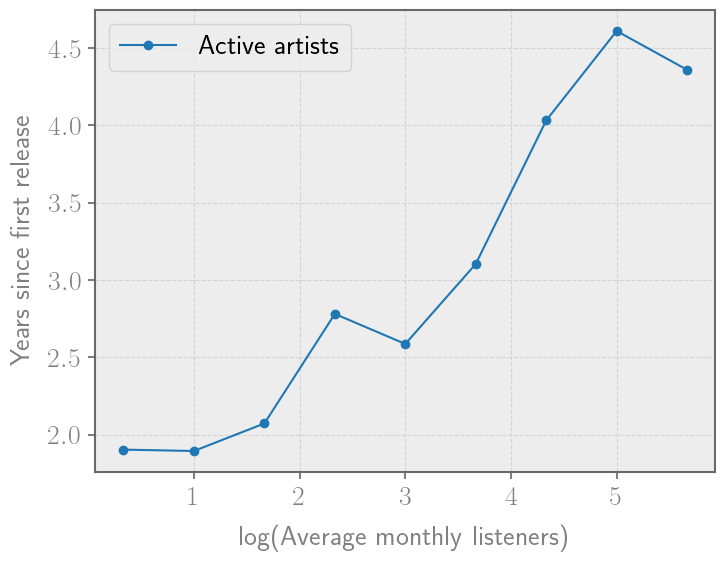

In [43]:
# get the average number of monthly listeners in bin of years since first release, using scipy binned_statistic

#binned_stat = binned_statistic(np.log10(ds['monthly_listeners']), ds['first_release'], statistic='mean', bins=np.linspace(0., 6., 10))
binned_stat_active = binned_statistic(np.log10(ds_active['monthly_listeners']), ds_active['first_release'], statistic='mean', bins=np.linspace(0., 6., 10))
bin_centers = 0.5*(binned_stat.bin_edges[1:] + binned_stat.bin_edges[:-1])

# plot the average number of monthly listeners in bin of years since first release
fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(bin_centers, binned_stat.statistic, label='All artists', marker='o')
ax.plot(bin_centers, binned_stat_active.statistic, label='Active artists', marker='o')
ax.set_ylabel('Years since first release')
ax.set_xlabel('log(Average monthly listeners)')
ax.legend()
plt.show()

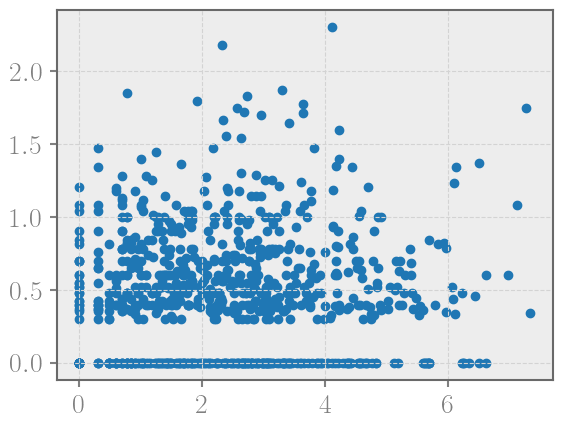

In [62]:
plt.scatter(np.log10(ds_active['monthly_listeners']), np.log10(ds_active['num_tracks']/ds_active['first_release']))
plt.show()

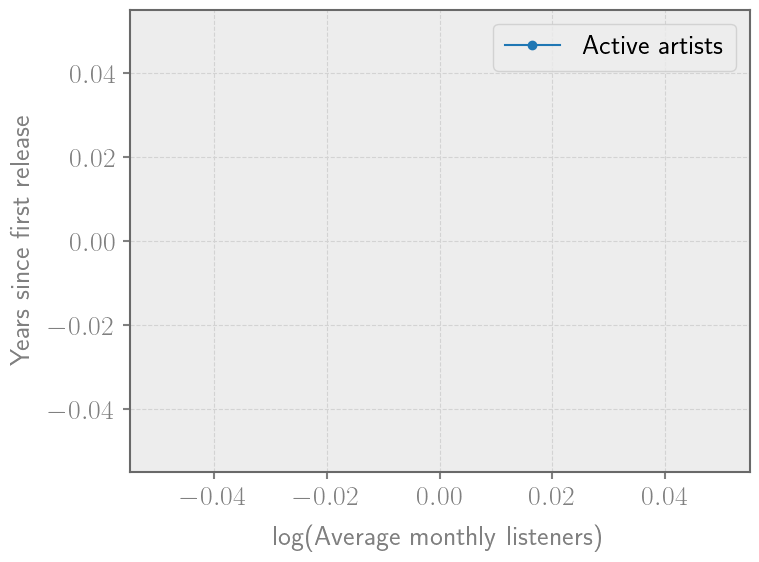

In [60]:
# get the average number of monthly listeners in bin of years since first release, using scipy binned_statistic

#binned_stat = binned_statistic(np.log10(ds['monthly_listeners']), ds['first_release'], statistic='mean', bins=np.linspace(0., 6., 10))
binned_stat_active = binned_statistic(np.log10(ds_active['monthly_listeners']+1), ds_active['num_tracks']/ds_active['first_release'], statistic='mean', bins=np.linspace(0., 6., 10))
bin_centers = 0.5*(binned_stat.bin_edges[1:] + binned_stat.bin_edges[:-1])

# plot the average number of monthly listeners in bin of years since first release
fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(bin_centers, binned_stat.statistic, label='All artists', marker='o')
ax.plot(bin_centers, binned_stat_active.statistic, label='Active artists', marker='o')
ax.set_ylabel('Years since first release')
ax.set_xlabel('log(Average monthly listeners)')
ax.legend()
plt.show()